In [19]:
import quandl
df = quandl.get("CHRIS/CME_ES2")
df.head()
df.tail()
df.shape

(5784, 8)

In [20]:
import talib as ta
df['EMA10'] = ta.EMA(df['Settle'].values, timeperiod=10)
df['EMA30'] = ta.EMA(df['Settle'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Settle'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Settle'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,,,
2020-05-26,2942.00,3010.50,2939.00,2985.50,41.25,2985.00,5726.0,38077.0,2918.664831,2855.845582,80.239863,13.082643,60.656875,46.461126,39.985233
2020-05-27,2981.25,3029.50,2956.00,3027.00,40.50,3025.50,7680.0,38772.0,2938.089407,2866.791029,79.758444,13.660392,63.228324,52.211382,42.430463
2020-05-28,3025.00,3055.75,3010.00,3027.25,2.50,3028.00,9653.0,39944.0,2954.436788,2877.191608,77.329270,14.520254,63.387402,56.320997,45.208570
2020-05-29,3026.25,3047.50,2982.25,3047.00,3.75,3031.75,11538.0,41330.0,2968.493735,2887.163117,76.466465,14.767672,63.641487,59.198092,48.006474
2020-06-01,3020.00,3048.25,2998.50,3043.25,11.75,3043.50,10676.0,43905.0,2982.131238,2897.249367,74.558146,15.007864,64.473427,61.714925,50.748164


In [21]:
import numpy as np
df['ClgtEMA10'] = np.where(df['Settle'] > df['EMA10'], 1, -1)
df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,
2020-05-26,2942.00,3010.50,2939.00,2985.50,41.25,2985.00,5726.0,38077.0,2918.664831,2855.845582,80.239863,13.082643,60.656875,46.461126,39.985233,1,1,-1
2020-05-27,2981.25,3029.50,2956.00,3027.00,40.50,3025.50,7680.0,38772.0,2938.089407,2866.791029,79.758444,13.660392,63.228324,52.211382,42.430463,1,1,-1
2020-05-28,3025.00,3055.75,3010.00,3027.25,2.50,3028.00,9653.0,39944.0,2954.436788,2877.191608,77.329270,14.520254,63.387402,56.320997,45.208570,1,1,-1
2020-05-29,3026.25,3047.50,2982.25,3047.00,3.75,3031.75,11538.0,41330.0,2968.493735,2887.163117,76.466465,14.767672,63.641487,59.198092,48.006474,1,1,-1
2020-06-01,3020.00,3048.25,2998.50,3043.25,11.75,3043.50,10676.0,43905.0,2982.131238,2897.249367,74.558146,15.007864,64.473427,61.714925,50.748164,1,1,-1


In [22]:
df['Return'] = df['Settle'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)
df['target_rgs'] = df['Return']
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,...,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls,target_rgs
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-26,2942.00,3010.50,2939.00,2985.50,41.25,2985.00,5726.0,38077.0,2918.664831,2855.845582,...,13.082643,60.656875,46.461126,39.985233,1,1,-1,0.013568,1,0.013568
2020-05-27,2981.25,3029.50,2956.00,3027.00,40.50,3025.50,7680.0,38772.0,2938.089407,2866.791029,...,13.660392,63.228324,52.211382,42.430463,1,1,-1,0.000826,1,0.000826
2020-05-28,3025.00,3055.75,3010.00,3027.25,2.50,3028.00,9653.0,39944.0,2954.436788,2877.191608,...,14.520254,63.387402,56.320997,45.208570,1,1,-1,0.001238,1,0.001238
2020-05-29,3026.25,3047.50,2982.25,3047.00,3.75,3031.75,11538.0,41330.0,2968.493735,2887.163117,...,14.767672,63.641487,59.198092,48.006474,1,1,-1,0.003876,1,0.003876
2020-06-01,3020.00,3048.25,2998.50,3043.25,11.75,3043.50,10676.0,43905.0,2982.131238,2897.249367,...,15.007864,64.473427,61.714925,50.748164,1,1,-1,NaN,0,NaN


In [23]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = df[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2020-05-26,80.239863,13.082643,60.656875,1,1,-1
2020-05-27,79.758444,13.660392,63.228324,1,1,-1
2020-05-28,77.329270,14.520254,63.387402,1,1,-1
2020-05-29,76.466465,14.767672,63.641487,1,1,-1
2020-06-01,74.558146,15.007864,64.473427,1,1,-1


In [24]:
y_cls = df.target_cls
y_cls.tail()

Date
2020-05-26    1
2020-05-27    1
2020-05-28    1
2020-05-29    1
2020-06-01    0
Name: target_cls, dtype: int64

In [25]:
y_rgs = df.target_rgs
y_rgs.tail()

Date
2020-05-26    0.013568
2020-05-27    0.000826
2020-05-28    0.001238
2020-05-29    0.003876
2020-06-01         NaN
Name: target_rgs, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(4048, 6) (4048,)
(1736, 6) (1736,)


In [27]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(4048, 6) (4048,)
(1736, 6) (1736,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [29]:
import pandas as pd
from sklearn.impute import SimpleImputer
X_cls_train_drop = pd.DataFrame(SimpleImputer().fit_transform(X_cls_train))
clf = clf.fit(X_cls_train_drop, y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

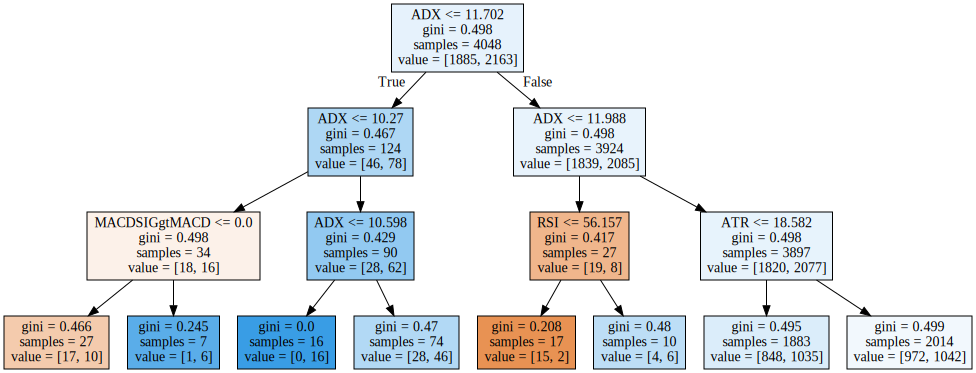

In [30]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)